# Технологии искусственного интеллекта. Семестр 1

© Петров М.В., старший преподаватель кафедры суперкомпьютеров и общей информатики, Самарский университет

## Лекция 2. Визуализация данных

### Содержание

1. [Библиотеки](#2.1-Библиотеки)
2. [Датасет](#2.2-Датасет)
3. [Предобработка данных](#2.3-Предобработка-данных)
4. [Интерактивный график в `matplotlib`](#2.4-Интерактивный-график-в-matplotlib)
5. [Интерактивный график в `plotly`](#2.5-Интерактивный-график-в-plotly)
6. [Построение графиков средствами `pandas`](#2.6-Построение-графиков-средствами-`pandas`)
7. [Построение графиков в `seaborn`](#2.7-Построение-графиков-в-seaborn)
8. [Построение различных графиков](#2.8-Построение-различных-графиков)
9. [Экспорт в растровый и векторный форматы](#2.9-Экспорт-в-растровый-и-векторный-форматы)
10. [`plotly` `Dash`](#2.10-plotly-Dash)

### 2.1 Библиотеки

- [matplotlib](https://matplotlib.org/)  
    Python-библиотека для визуализации данных.
- [seaborn](https://seaborn.pydata.org/index.html)  
    Библиотека для создания статистических графиков на Python. Она основывается на `matplotlib` и тесно взаимодействует со структурами данных `pandas`.
- [plotly](https://plotly.com/python/)  
   Библиотека для визуализации данных.
   - Фреймворк [Dash](https://dash.plotly.com/).

Гайды по `matplotlib`:
- [Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)
- [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html)
- [Examples](https://matplotlib.org/stable/gallery/index.html)
- [Interactive Plotting in IPython](https://ipython.readthedocs.io/en/stable/interactive/plotting.html)
- [Enable interactive mode - matplotlib.pyplot.ion](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ion.html)

Гайды по `seaborn`:
- [Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Visualizing categorical data](https://seaborn.pydata.org/tutorial/categorical.html)

Гайды по `plotly`:
- [Шпаргалка по визуализации данных в Python с помощью Plotly @ Хабр](https://habr.com/ru/articles/502958/)
- [Забудьте о matplotlib: визуализация данных в Python вместе с plotly @ proglib](https://proglib.io/p/plotly)
- [Визуализация данных с помощью Python Dash @ Хабр](https://habr.com/ru/companies/otus/articles/716190/)

Гайды по `pandas`:
- [pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
- [Chart visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

Гайды:
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/ru/company/ods/blog/323210/)

### 2.2 Датасет

[Goodreads Books - 31 Features](https://www.kaggle.com/datasets/austinreese/goodreads-books)

| Признак                | Описание                                                                                                    |
|------------------------|-------------------------------------------------------------------------------------------------------------|
| id                     | id книги                                                                                                    |
| title                  | Название книги                                                                                              |
| link                   | Ссылка на Goodreads                                                                                         |
| series                 | Название цикла, если книга является частью многоциколового произведения                                     |
| cover_link             | Ссылка на обложку книги                                                                                     |
| author                 | Список авторов книжного произведения                                                                        |
| author_link            | Ссылка на запись об авторах книжного произведения                                                           |
| rating_count           | Количество выставленных оценок на книжное произведение                                                      |
| review_count           | Количество оставленных отзывов на книжное произведение                                                      |
| average_rating         | Средняя оценка книжного произведения                                                                        |
| five_star_ratings      | Количество выставленных оценок на книжное произведение "5 звезд"                                            |
| four_star_ratings      | Количество выставленных оценок на книжное произведение "4 звезды"                                           |
| three_star_ratings     | Количество выставленных оценок на книжное произведение "3 звезды"                                           |
| two_star_ratings       | Количество выставленных оценок на книжное произведение "2 звезды"                                           |
| one_star_ratings       | Количество выставленных оценок на книжное произведение "1 звезда"                                           |
| number_of_pages        | Количество страниц в книжном произведении                                                                   |
| date_published         | Дата выхода книги в печатном издании                                                                        |
| publisher              | Название издательства                                                                                       |
| original_title         | Исходное название книги                                                                                     |
| genre_and_votes        | Список указанных пользователями жанров в виде <жанр1 N1>, <жанр2 N2>, где N1, N2 &ndash; количество "меток" |
| isbn                   | ISBN номер книжного произведения                                                                            |
| isbn13                 | 13-тизначный ISBN номер книжного произведения                                                               |
| asin                   | Amazon Standard Identification Number &ndash; артикул на площадке Amazon                                    |
| settings               | Место (или несколько), в котором происходят описываемые в книге события                                     |
| characters             | Имена основных персонажей в книге                                                                           |
| awards                 | Список названий присужденных книжному произведению премий (наград)                                          |
| amazon_redirect_link   | URL ссылка редиректа на площадку Amazon                                                                     |
| worldcat_redirect_link | URL ссылка редиректа на Goodread's WorldCat                                                                 |
| recommended_books      | Список id рекомендуемых книг с Goodreads                                                                    |
| books_in_series        | Список id книг, входящих в одноименный цикл                                                                 |
| description            | Синопсис                                                                                                    |

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
# путь к папке с данными
data_path = "../lecture_1/data"
# датасет: Goodreads Books - 31 Features: https://www.kaggle.com/datasets/austinreese/goodreads-books
df = pd.read_csv(Path(data_path, 'goodreads_books.csv'))
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      52199 non-null  int64  
 1   title                   52199 non-null  object 
 2   link                    52199 non-null  object 
 3   series                  23319 non-null  object 
 4   cover_link              51592 non-null  object 
 5   author                  52199 non-null  object 
 6   author_link             52199 non-null  object 
 7   rating_count            52199 non-null  int64  
 8   review_count            52199 non-null  int64  
 9   average_rating          52199 non-null  float64
 10  five_star_ratings       52199 non-null  int64  
 11  four_star_ratings       52199 non-null  int64  
 12  three_star_ratings      52199 non-null  int64  
 13  two_star_ratings        52199 non-null  int64  
 14  one_star_ratings        52199 non-null

,id,title,link,series,cover_link,author,author_link,rating_count,review_count,average_rating,...,isbn13,asin,settings,characters,awards,amazon_redirect_link,worldcat_redirect_link,recommended_books,books_in_series,description
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),https://i.gr-assets.com/images/S/compressed.ph...,"Kate Brian, Julian Peploe",https://www.goodreads.com/author/show/94091.Ka...,7597,196,4.03,...,9781416950417,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"726458, 726458, 1537534, 3047848, 1651302, 304...","381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,4179,177,4.35,...,9781595542328,NaN,NaN,NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"127352, 127352, 40642197, 127353, 127354, 3891...",115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),https://i.gr-assets.com/images/S/compressed.ph...,Karen Kingsbury,https://www.goodreads.com/author/show/3159984....,6288,218,4.23,...,NaN,NaN,"Bloomington, Indiana(United States)",NaN,NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"706250, 706250, 666481, 11942636, 706241, 1273...","4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),https://i.gr-assets.com/images/S/compressed.ph...,"Douglas Preston, Lincoln Child",https://www.goodreads.com/author/show/12577.Do...,38382,1424,4.01,...,9780765354952,NaN,"New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"39026, 39026, 11007668, 3986318, 51887330, 194...","67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Thomas J. Stanley, William D. Danko",https://www.goodreads.com/author/show/659.Thom...,72168,3217,4.04,...,9780671015206,NaN,NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"1052, 1052, 763362, 69571, 78427, 30186948, 10...",NaN,The incredible national bestseller that is cha...
5,311164,Black Sheep,https://www.goodreads.com//book/show/311164.Bl...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Georgette Heyer,https://www.goodreads.com/author/show/18067.Ge...,9538,775,4.05,...,9780099468035,NaN,NaN,"Abigail Wendover, Miles Calverleigh",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"6528786, 6528786, 311125, 376509, 40487683, 28...",NaN,With her high-spirited intelligence and good l...
6,32105,Sylvester,https://www.goodreads.com//book/show/32105.Syl...,NaN,https://i.gr-assets.com/images/S/compressed.ph...,"Georgette Heyer, Joan Wolf",https://www.goodreads.com/author/show/18067.Ge...,13473,1141,4.11,...,9780373836086,NaN,NaN,"Phoebe Marlow, Sylvester, Duke of Salford",NaN,https://www.goodreads.com//book_link/follow/17...,https://www.goodreads.com//book_link/follow/8?...,"311125, 311125, 40188318, 40487683, 222754, 13...",NaN,"When the news went out that Sylvester Rayne, t..."
7,377993,Joe,https://www.goodreads.com//book/show/377993.Joe,NaN,https://i.gr-assets.com/images/S/compressed.ph...,Larry Brown,https://www.goodreads.com/author/show/31125.La...,2722,2

### 2.3 Предобработка данных
#### Дропаем ненужные очевидные признаки

Уберем из датафрейма следующие признаки:
- `link`: ссылка на Goodreads
- `cover_link`: ссылка на обложку книги
- `author_link`: ссылка на запись об авторах книжного произведения
- `original_title`: исходное название книги
- `isbn`: ISBN номер книжного произведения
- `isbn13`: 13-тизначный ISBN номер книжного произведения
- `asin`: Amazon Standard Identification Number &ndash; артикул на площадке Amazon
- `amazon_redirect_link`: URL ссылка редиректа на площадку Amazon
- `worldcat_redirect_link`: URL ссылка редиректа на Goodread's WorldCat
- `recommended_books`: список id рекомендуемых книг с Goodreads 

In [2]:
df.drop(columns=['link', 'cover_link', 'author_link', 'original_title', 'isbn', 'isbn13', 'asin', 'amazon_redirect_link', 'worldcat_redirect_link',
                 'recommended_books'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52199 entries, 0 to 52198
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  52199 non-null  int64  
 1   title               52199 non-null  object 
 2   series              23319 non-null  object 
 3   author              52199 non-null  object 
 4   rating_count        52199 non-null  int64  
 5   review_count        52199 non-null  int64  
 6   average_rating      52199 non-null  float64
 7   five_star_ratings   52199 non-null  int64  
 8   four_star_ratings   52199 non-null  int64  
 9   three_star_ratings  52199 non-null  int64  
 10  two_star_ratings    52199 non-null  int64  
 11  one_star_ratings    52199 non-null  int64  
 12  number_of_pages     49869 non-null  float64
 13  date_published      51339 non-null  object 
 14  publisher           48563 non-null  object 
 15  genre_and_votes     49359 non-null  object 
 16  sett

In [3]:
df.head(10)

,id,title,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,...,one_star_ratings,number_of_pages,date_published,publisher,genre_and_votes,settings,characters,awards,books_in_series,description
0,630104,Inner Circle,(Private #5),"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,...,92,220.0,January 1st 2007,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",NaN,NaN,NaN,"381489, 381501, 352428, 630103, 1783281, 17832...",Reed Brennan arrived at Easton Academy expecti...
1,9487,A Time to Embrace,(Timeless Love #2),Karen Kingsbury,4179,177,4.35,2255,1290,518,...,23,400.0,October 29th 2006,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,NaN,NaN,115036,"Ideje az Ã¶lelÃ©snek TÃ¶rtÃ©net a remÃ©nyrÅl,..."
2,6050894,Take Two,(Above the Line #2),Karen Kingsbury,6288,218,4.23,3000,2020,1041,...,44,320.0,January 1st 2009,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58","Bloomington, Indiana(United States)",NaN,NaN,"4010795, 40792877, 7306261",Filmmakers Chase Ryan and Keith Ellison have c...
3,39030,Reliquary,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,...,324,464.0,1997,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...","New York State(United States) New York City, N...","Aloysius X.L. Pendergast, Margo Green, William...",NaN,"67035, 39031, 39033, 136637, 136638, 30068, 39...",NaN
4,998,The Millionaire Next Door: The Surprising Secr...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,...,1086,258.0,October 28th 1995,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",NaN,NaN,Independent Publisher Book Award (IPPY) Nomine...,NaN,The incredible national bestseller that is cha...
5,311164,Black Sheep,NaN,Georgette Heyer,9538,775,4.05,3298,3831,2042,...,63,252.0,March 1st 1966,Arrow,"Romance 550, Historical-Historical Fiction 316...",NaN,"Abigail Wendover, Miles Calverleigh",NaN,NaN,With her high-spirited intelligence and good l...
6,32105,Sylvester,NaN,"Georgette Heyer, Joan Wolf",13473,1141,4.11,5216,5225,2470,...,128,410.0,1957,Harlequin,"Romance 725, Historical-Historical Fiction 395...",NaN,"Phoebe Marlow, Sylvester, Duke of Salford",NaN,NaN,"When the news went out that Sylvester Rayne, t..."
7,377993,Joe,NaN,Larry Brown,2722,260,4.18,1111,1119,385,...,31,368.0,1980,Algonquin Books,"Fiction 106, American-Southern 26, Gothic-Sout...",NaN,NaN,NaN,NaN,Now a major motion picture starring Nicolas Ca...
8,71292,Asterix the Gaul,(AstÃ©rix #1),"RenÃ© Goscinny, Albert Uderzo, Anthea Bell, De...",23324,534,4.17,10488,7797,3942,...,385,48.0,July 14th 1960,"Orion Books Ltd., London","Sequential Art-Comics 947, Sequential Art-Grap...","Armorica, Brittany(France)","Asterix, Obelix, Julius Caesar, Panoramix, Ass...",NaN,"122439, 122408, 122401, 122421, 122410, 122404...","The year is 50BC, and all Gaul is occupied. On..."
9,821003,When We Were Very Young,(Winnie-the-Pooh #3),"A.A. Milne, Ernest H. Shepard",21973,532,4.30,11753,6063,3349,...,185,100.0,November 1924,E.P. Dutton,"Poetry 599, Childrens 384, Classics 301, Ficti...",NaN,NaN,NaN,"99107, 776407, 821000",NaN


#### Парсим год выхода

##### Избавимся от NaN

In [4]:
print(f"{df[df['date_published'].isna()].shape[0]} out of {df['date_published'].shape[0]} is NaN")

860 out of 52199 is NaN


In [5]:
df.drop(df[df['date_published'].isna()].index, inplace=True)
df['date_published'].shape[0]

51339

In [6]:
df['date_published'].head(10)

0     January 1st 2007
1    October 29th 2006
2     January 1st 2009
3                 1997
4    October 28th 1995
5       March 1st 1966
6                 1957
7                 1980
8       July 14th 1960
9        November 1924
Name: date_published, dtype: object

##### Добавим признак `Год выхода` и спарсим год из даты

In [7]:
# см. https://regex101.com/
df.loc[:, 'year_published'] = df['date_published'].str.extract(r'(\d{4})').to_numpy().flatten()
df.drop(df[df['year_published'].isna()].index, inplace=True)
df['year_published'] = df['year_published'].astype(int)
# дропаем дату выхода
df.drop(columns=['date_published'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51190 entries, 0 to 52198
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  51190 non-null  int64  
 1   title               51190 non-null  object 
 2   series              23034 non-null  object 
 3   author              51190 non-null  object 
 4   rating_count        51190 non-null  int64  
 5   review_count        51190 non-null  int64  
 6   average_rating      51190 non-null  float64
 7   five_star_ratings   51190 non-null  int64  
 8   four_star_ratings   51190 non-null  int64  
 9   three_star_ratings  51190 non-null  int64  
 10  two_star_ratings    51190 non-null  int64  
 11  one_star_ratings    51190 non-null  int64  
 12  number_of_pages     49530 non-null  float64
 13  publisher           48246 non-null  object 
 14  genre_and_votes     48562 non-null  object 
 15  settings            11436 non-null  object 
 16  character

#### Удаляем скобки в столбце `series`

In [8]:
df.series.head(10)

0            (Private #5)
1      (Timeless Love #2)
2     (Above the Line #2)
3         (Pendergast #2)
4                     NaN
5                     NaN
6                     NaN
7                     NaN
8           (AstÃ©rix #1)
9    (Winnie-the-Pooh #3)
Name: series, dtype: object

In [9]:
df['series'] = df['series'].str.strip('()')
df.series.head(10)

0            Private #5
1      Timeless Love #2
2     Above the Line #2
3         Pendergast #2
4                   NaN
5                   NaN
6                   NaN
7                   NaN
8           AstÃ©rix #1
9    Winnie-the-Pooh #3
Name: series, dtype: object

Отделим порядковый номер книги в книжном издании `#N` от самого названия цикла.

In [10]:
df['series'].str.extract(r'( *#\d+ *)')

,0
0,#5
1,#2
2,#2
3,#2
4,NaN
...,...
52194,NaN
52195,NaN
52196,NaN
52197,#4


In [11]:
# сначала проверим результат замены с regexp'ом
df['series'].str.replace(r'( *#\d+ *)', '', regex=True)

0               Private
1         Timeless Love
2        Above the Line
3            Pendergast
4                   NaN
              ...      
52194               NaN
52195               NaN
52196               NaN
52197           Private
52198               NaN
Name: series, Length: 51190, dtype: object

In [12]:
df['series'] = df['series'].str.replace(r'( *#\d+ *)', '', regex=True)
df.series.head(10)

0            Private
1      Timeless Love
2     Above the Line
3         Pendergast
4                NaN
5                NaN
6                NaN
7                NaN
8           AstÃ©rix
9    Winnie-the-Pooh
Name: series, dtype: object

#### Проанализируем `books_in_series`

In [13]:
df.books_in_series.head(10)

0    381489, 381501, 352428, 630103, 1783281, 17832...
1                                               115036
2                           4010795, 40792877, 7306261
3    67035, 39031, 39033, 136637, 136638, 30068, 39...
4                                                  NaN
5                                                  NaN
6                                                  NaN
7                                                  NaN
8    122439, 122408, 122401, 122421, 122410, 122404...
9                                99107, 776407, 821000
Name: books_in_series, dtype: object

#### Добавим признак `books_in_series_count` &ndash; количество книг в цикле
> Пример того самого *feature engineering*.

In [14]:
df['books_in_series_count'] = [len([idx for idx in x.split(',')])
                               if pd.notna(x)
                               else 0
                               for x in df['books_in_series']]
df['books_in_series_count'] += 1  # не забываем посчитать и саму книгу
df['books_in_series_count'].head(10)

0    11
1     2
2     4
3    11
4     1
5     1
6     1
7     1
8    11
9     4
Name: books_in_series_count, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51190 entries, 0 to 52198
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     51190 non-null  int64  
 1   title                  51190 non-null  object 
 2   series                 23034 non-null  object 
 3   author                 51190 non-null  object 
 4   rating_count           51190 non-null  int64  
 5   review_count           51190 non-null  int64  
 6   average_rating         51190 non-null  float64
 7   five_star_ratings      51190 non-null  int64  
 8   four_star_ratings      51190 non-null  int64  
 9   three_star_ratings     51190 non-null  int64  
 10  two_star_ratings       51190 non-null  int64  
 11  one_star_ratings       51190 non-null  int64  
 12  number_of_pages        49530 non-null  float64
 13  publisher              48246 non-null  object 
 14  genre_and_votes        48562 non-null  object 
 15  setting

In [16]:
# количество "серийных" книжных изданий (НЕ серий, а именно книг, входящих в книжные циклы
len(df[df['books_in_series_count'] > 1])

21843

In [17]:
# количество книжных циклов
df['series'].unique().shape

(11590,)

#### Проанализируем `awards`

In [18]:
pd.set_option('display.width', 1000)
df[df.awards.notna()].awards.head(10)

4     Independent Publisher Book Award (IPPY) Nomine...
10    Romantic Times Reviewers' Choice Award (RT Awa...
13    Goodreads Choice Award Nominee for Nonfiction ...
15                                    SFBC Award (1991)
16    International Napoleonic Society Literary Awar...
26    Theakston Old Peculier Crime Novel of the Year...
28    BTBA Best Translated Book Award Nominee for Fi...
30    Romantic Times Reviewers' Choice Award (RT Awa...
31    Mythopoeic Fantasy Award Nominee for Children'...
35    ALA Alex Award (2010), Corine Internationaler ...
Name: awards, dtype: object

In [19]:
df.awards[10]

"Romantic Times Reviewers' Choice Award (RT Award) for Fantasy Adventure (2015), Goodreads Choice Award Nominee for Fantasy (2015)"

Допустим, мы хотим в данном признаке оставить перечисление названий книжных премий без указания года присуждения.

In [20]:
df[df.awards.notna()].awards.str.replace(r' *\(\d+\) *', '', regex=True)

4        Independent Publisher Book Award (IPPY) Nomine...
10       Romantic Times Reviewers' Choice Award (RT Awa...
13           Goodreads Choice Award Nominee for Nonfiction
15                                              SFBC Award
16         International Napoleonic Society Literary Award
                               ...                        
52190    Anthony Award for Best First Novel, Grand Prix...
52191    Barry Award Nominee for Best Novel, Dilys Awar...
52193                           Edgar Award for Best Novel
52195    Goodreads Choice Award for Nonfiction, Waterst...
52196    Austrian National Prize, City of Vienna Juveni...
Name: awards, Length: 10593, dtype: object

In [21]:
df.awards = df.awards.str.replace(r' *\(\d+\) *', '', regex=True)
df[df.awards.notna()].awards.head(10)

4     Independent Publisher Book Award (IPPY) Nomine...
10    Romantic Times Reviewers' Choice Award (RT Awa...
13        Goodreads Choice Award Nominee for Nonfiction
15                                           SFBC Award
16      International Napoleonic Society Literary Award
26    Theakston Old Peculier Crime Novel of the Year...
28    BTBA Best Translated Book Award Nominee for Fi...
30    Romantic Times Reviewers' Choice Award (RT Awa...
31    Mythopoeic Fantasy Award Nominee for Children'...
35    ALA Alex Award, Corine Internationaler Buchpre...
Name: awards, dtype: object

In [22]:
df.awards[10]

"Romantic Times Reviewers' Choice Award (RT Award) for Fantasy Adventure, Goodreads Choice Award Nominee for Fantasy"

#### Добавим признак `awards_count`

In [23]:
df['awards_count'] = [len([idx for idx in x.split(',')])
                      if pd.notna(x)
                      else 0
                      for x in df['awards']]
df[df['awards_count'] > 0]['awards_count'].head(10)

4     1
10    2
13    1
15    1
16    1
26    1
28    3
30    2
31    1
35    2
Name: awards_count, dtype: int64

##### Какая самая титулованная книга?

In [24]:
df.loc[df['awards_count'].idxmax(), ['title', 'awards', 'awards_count']]

title                                            The Hunger Games
awards          Locus Award Nominee for Best Young Adult Book,...
awards_count                                                   40
Name: 41514, dtype: object

#### Проанализируем признак `author`

In [25]:
df['author'].head(10)

0                            Kate Brian, Julian Peploe
1                                      Karen Kingsbury
2                                      Karen Kingsbury
3                       Douglas Preston, Lincoln Child
4                  Thomas J. Stanley, William D. Danko
5                                      Georgette Heyer
6                           Georgette Heyer, Joan Wolf
7                                          Larry Brown
8    RenÃ© Goscinny, Albert Uderzo, Anthea Bell, De...
9                        A.A. Milne, Ernest H. Shepard
Name: author, dtype: object

In [26]:
df['author'][0]

'Kate Brian, Julian Peploe'

Преобразуем строку в массив строк.

In [27]:
df['author'] = [[idx for idx in x.split(',')] for x in df['author']]
df['author'].head(10)

0                         [Kate Brian,  Julian Peploe]
1                                    [Karen Kingsbury]
2                                    [Karen Kingsbury]
3                    [Douglas Preston,  Lincoln Child]
4               [Thomas J. Stanley,  William D. Danko]
5                                    [Georgette Heyer]
6                        [Georgette Heyer,  Joan Wolf]
7                                        [Larry Brown]
8    [RenÃ© Goscinny,  Albert Uderzo,  Anthea Bell,...
9                     [A.A. Milne,  Ernest H. Shepard]
Name: author, dtype: object

In [28]:
df['author'][0]

['Kate Brian', ' Julian Peploe']

#### Проанализируем признак `genre_and_votes`

In [29]:
df.genre_and_votes

0                  Young Adult 161, Mystery 45, Romance 32
1        Christian Fiction 114, Christian 45, Fiction 3...
2          Christian Fiction 174, Christian 81, Fiction 58
3        Thriller 626, Mystery 493, Horror 432, Fiction...
4        Economics-Finance 1162, Nonfiction 910, Busine...
                               ...                        
52194    Romance-Historical Romance 335, Romance 312, H...
52195    Nonfiction 1307, Short Stories 766, Writing-Es...
52196    Fiction 13, Childrens 11, Historical-Historica...
52197              Young Adult 182, Mystery 52, Romance 34
52198    Biography 176, Nonfiction 171, Politics 165, B...
Name: genre_and_votes, Length: 51190, dtype: object

Возможно, информация о количестве проставленных тегов может представлять для нас какой-то интерес. Например, получить популярность того или иного жанра.
> Вдруг какой-нибудь жанр наиболее предпочитаем пользователем, и ему везде "мерещится" наличие элементов этого жанра в прочитанных им произведениях.

Мы же просто уберем количество проставленных тегов.

In [30]:
# тестовая проверка удаления количества проставленных тегов
df.genre_and_votes.str.replace(r'( *\d+ *)', '', regex=True)

0                            Young Adult, Mystery, Romance
1           Christian Fiction, Christian, Fiction, Romance
2                    Christian Fiction, Christian, Fiction
3                       Thriller, Mystery, Horror, Fiction
4        Economics-Finance, Nonfiction, Business, Finan...
                               ...                        
52194    Romance-Historical Romance, Romance, Historica...
52195    Nonfiction, Short Stories, Writing-Essays, Aut...
52196    Fiction, Childrens, Historical-Historical Fict...
52197                        Young Adult, Mystery, Romance
52198    Biography, Nonfiction, Politics, Biography-Aut...
Name: genre_and_votes, Length: 51190, dtype: object

In [31]:
df.genre_and_votes.str.replace(r'(, )', ',', regex=True)

0                    Young Adult 161,Mystery 45,Romance 32
1        Christian Fiction 114,Christian 45,Fiction 33,...
2            Christian Fiction 174,Christian 81,Fiction 58
3          Thriller 626,Mystery 493,Horror 432,Fiction 422
4        Economics-Finance 1162,Nonfiction 910,Business...
                               ...                        
52194    Romance-Historical Romance 335,Romance 312,His...
52195    Nonfiction 1307,Short Stories 766,Writing-Essa...
52196    Fiction 13,Childrens 11,Historical-Historical ...
52197                Young Adult 182,Mystery 52,Romance 34
52198    Biography 176,Nonfiction 171,Politics 165,Biog...
Name: genre_and_votes, Length: 51190, dtype: object

In [32]:
# дропаем NaN и вносим изменения
df.dropna(subset=['genre_and_votes'], inplace = True)
df.genre_and_votes = df.genre_and_votes.str.replace(r'( *\d+ *)', '', regex=True)
df.genre_and_votes = df.genre_and_votes.str.replace(', ', ',')
df.genre_and_votes[8]

'Sequential Art-Comics,Sequential Art-Graphic Novels,Sequential Art-Bande DessinÃ©e,Fiction,Humor,Cultural-France'

Можно заметить, что помимо жанров имеются поджанры. Иерархическую структуру данных этого признака можно отразить в датафрейме путем дублирования данных (с точки зрения основной сущности &ndash; записи о книжном издании): ввести признаки `genre` и `subgenre`, например. И на какой-то стадии обработки и/или анализа данных по жанрам задать MultiIndex `genre` &rarr; `subgenre`.

Нужные нам регулярки для выделения:
- жанра &ndash; все, что идет до разделителя "-": `([\w ]+)(?>-)`
- поджанра &ndash; все, что идет после разделителя "-": `(?<=-)([\w ]+)`

In [33]:
# поджанры
df.genre_and_votes.str.findall(r'(?<=-)([\w ]+)')

0                                                       []
1                                                       []
2                                                       []
3                                                       []
4        [Finance, Personal Finance, Money, Personal De...
                               ...                        
52194    [Historical Romance, Erotica, Historical Fiction]
52195                      [Essays, Memoir, Coming Of Age]
52196                                 [Historical Fiction]
52197                                                   []
52198                              [Autobiography, Memoir]
Name: genre_and_votes, Length: 48562, dtype: object

In [34]:
# жанры
df.genre_and_votes.str.findall(r'([\w ]+)(?>-)')
# см. https://stackoverflow.com/a/74722529

error: unknown extension ?> at position 9

> В Python &leq; 3.10 данная конструкция выполнится с ошибкой, так как поддержка некоторых элементов синтаксиса регэкспа добавлена в версии 3.11.
> Подробнее:
> - [Python Regex - Unknown extension "?>" @ StackOverflow](https://stackoverflow.com/questions/74721240/python-regex-unknown-extension/74722529)
> - [Сверхжадные квантификаторы @ Хабр](https://habr.com/ru/articles/55863/)

В случае успеха мы увидим, что регэкспом мы поймали жанры, у которых есть поджанр, но пропустили жанры без поджанра. Возможно, вместо сложного регулярного выражения имеет смысл выполнить двухэтапный сплит: сначала по ",", потом сплит или регулярка по "-".  
После заполнения признаков `genre` и `subgenre` массивами (если у жанра нет поджанра, просто проставим `None`) можно воспользоваться методом [.explode()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).  
Далее осуществим более простой вариант: смешаем жанры и поджанры в одном признаке.

In [35]:
df.genre_and_votes[8]

'Sequential Art-Comics,Sequential Art-Graphic Novels,Sequential Art-Bande DessinÃ©e,Fiction,Humor,Cultural-France'

In [36]:
df.genre_and_votes.str.findall(r'([\w ]+)')[8]

['Sequential Art',
 'Comics',
 'Sequential Art',
 'Graphic Novels',
 'Sequential Art',
 'Bande DessinÃ',
 'e',
 'Fiction',
 'Humor',
 'Cultural',
 'France']

Как видно, такая конструкция выделит все слова с пробелом. Однако, поджанр "Bande DessinÃ©e" превратился в два: 'Bande DessinÃ', 'e'. К тому же мы получили дубли.

In [37]:
df.genre_and_votes = df.genre_and_votes.str.findall(r'([\w ]+)')

Избавимся от дубликатов.

In [38]:
# тестовая проверка
df.genre_and_votes.apply(lambda x: pd.unique(x))

C:\Users\UD\AppData\Local\Temp\ipykernel_98244\165336258.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df.genre_and_votes.apply(lambda x: pd.unique(x))


0                          [Young Adult, Mystery, Romance]
1         [Christian Fiction, Christian, Fiction, Romance]
2                  [Christian Fiction, Christian, Fiction]
3                     [Thriller, Mystery, Horror, Fiction]
4        [Economics, Finance, Nonfiction, Business, Per...
                               ...                        
52194    [Romance, Historical Romance, Historical, Adul...
52195    [Nonfiction, Short Stories, Writing, Essays, A...
52196    [Fiction, Childrens, Historical, Historical Fi...
52197                      [Young Adult, Mystery, Romance]
52198    [Biography, Nonfiction, Politics, Autobiograph...
Name: genre_and_votes, Length: 48562, dtype: object

In [39]:
# фикс ворнинга
df.genre_and_votes.apply(lambda x: pd.unique(np.array(x)))

0                          [Young Adult, Mystery, Romance]
1         [Christian Fiction, Christian, Fiction, Romance]
2                  [Christian Fiction, Christian, Fiction]
3                     [Thriller, Mystery, Horror, Fiction]
4        [Economics, Finance, Nonfiction, Business, Per...
                               ...                        
52194    [Romance, Historical Romance, Historical, Adul...
52195    [Nonfiction, Short Stories, Writing, Essays, A...
52196    [Fiction, Childrens, Historical, Historical Fi...
52197                      [Young Adult, Mystery, Romance]
52198    [Biography, Nonfiction, Politics, Autobiograph...
Name: genre_and_votes, Length: 48562, dtype: object

In [40]:
# внесем изменения
df.genre_and_votes = df.genre_and_votes.apply(lambda x: pd.unique(np.array(x)))
df.rename(columns = {'genre_and_votes' : 'genre'}, inplace = True)
df.genre

0                          [Young Adult, Mystery, Romance]
1         [Christian Fiction, Christian, Fiction, Romance]
2                  [Christian Fiction, Christian, Fiction]
3                     [Thriller, Mystery, Horror, Fiction]
4        [Economics, Finance, Nonfiction, Business, Per...
                               ...                        
52194    [Romance, Historical Romance, Historical, Adul...
52195    [Nonfiction, Short Stories, Writing, Essays, A...
52196    [Fiction, Childrens, Historical, Historical Fi...
52197                      [Young Adult, Mystery, Romance]
52198    [Biography, Nonfiction, Politics, Autobiograph...
Name: genre, Length: 48562, dtype: object

### 2.4 Интерактивный график в `matplotlib`
#### Сгруппируем оценки пользователей по годам выхода книжного издания

In [41]:
df_ratings = df.groupby('year_published') \
    .agg({'rating_count' : 'sum',
          'five_star_ratings' : 'sum',
          'four_star_ratings': 'sum',
          'three_star_ratings': 'sum',
          'two_star_ratings': 'sum',
          'one_star_ratings': 'sum'}) \
    .reset_index()
df_ratings.describe()

,year_published,rating_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
count,446.000000,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02,4.460000e+02
mean,1720.760090,2.197842e+06,9.107610e+05,7.281215e+05,4.021078e+05,1.087547e+05,4.809649e+04
std,247.531332,6.586845e+06,2.762668e+06,2.178132e+06,1.187946e+06,3.294902e+05,1.512385e+05
min,1000.000000,7.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1599.250000,5.066750e+03,1.689500e+03,1.403750e+03,1.058500e+03,3.190000e+02,1.122500e+02
50%,1796.500000,5.987000e+04,2.058500e+04,2.020150e+04,1.462200e+04,3.980500e+03,1.421000e+03
75%,1909.750000,9.759775e+05,3.674650e+05,3.236198e+05,1.861675e+05,5.010150e+04,1.780975e+04
max,2021.000000,5.516730e+07,2.375305e+07,1.820474e+07,9.391810e+06,2.603820e+06,1.285149e+06


#### Ограничим год выхода 1800+

In [42]:
df_ratings = df_ratings[df_ratings.year_published > 1800]
ratings = ['five_star_ratings', 'four_star_ratings',
           'three_star_ratings', 'two_star_ratings',
           'one_star_ratings']

#### Количество оценок переведем в %

In [43]:
# show rating categories as a percentage
for ratings in ratings:
    df_ratings[ratings] = df_ratings[ratings] / df_ratings['rating_count'] * 100
df_ratings = df_ratings.reset_index(drop=True)
df_ratings.head()

,year_published,rating_count,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings
0,1801,940,17.021277,24.042553,34.787234,18.936170,5.212766
1,1802,5201,20.361469,30.321092,30.186503,13.901173,5.229764
2,1804,2728,42.705279,33.944282,16.788856,4.802053,1.759531
3,1806,1570,20.191083,34.076433,30.636943,11.910828,3.184713
4,1807,14940,39.879518,28.929050,20.287818,7.088353,3.815261


#### Импорт библиотек

In [44]:
# magic function - см. Interactive Plotting in IPython
%matplotlib inline
%matplotlib widget
# %matplotlib ipympl
from ipywidgets import *
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from itertools import cycle
# см. https://ipython.readthedocs.io/en/stable/interactive/plotting.html
# Starting with IPython 5.0 and matplotlib 2.0 you can avoid the use of IPython’s specific magic
# and use matplotlib.pyplot.ion()/matplotlib.pyplot.ioff() which have the advantages of working outside of IPython as well.
# plt.ion()

In [45]:
mpl.__version__

'3.10.0'

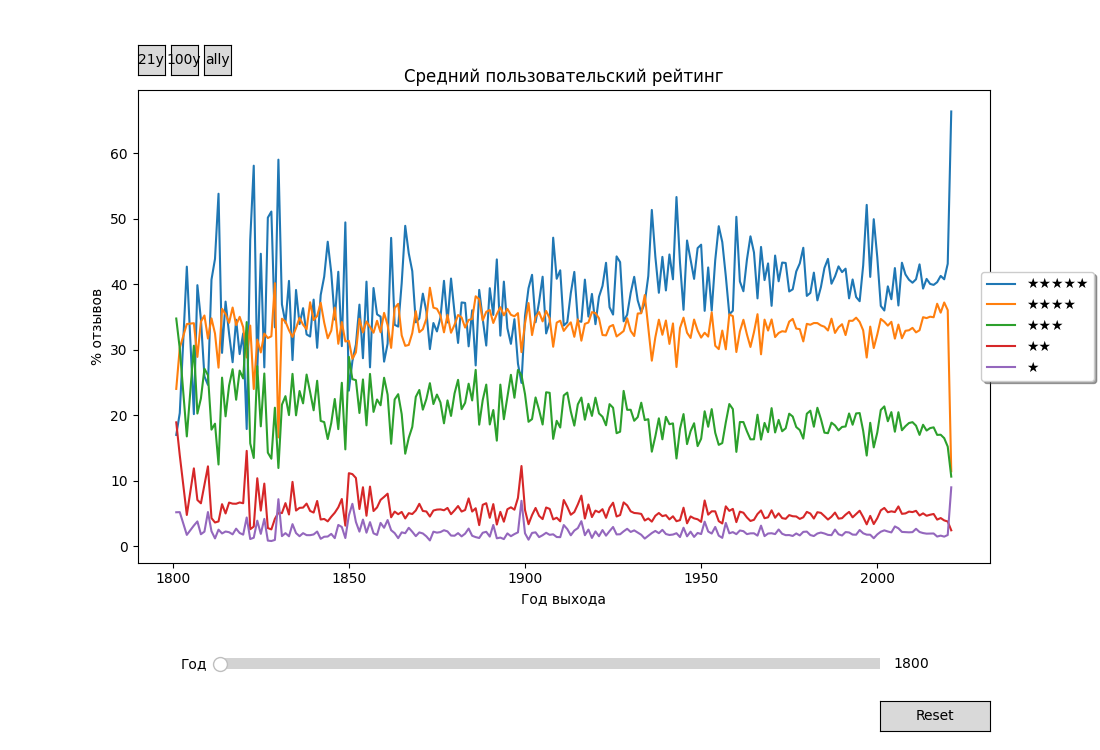

In [47]:
from matplotlib.widgets import Slider, Button
%matplotlib widget

def mpl_iplot():
    fig, ax = plt.subplots(figsize=(11, 7.5))
    r5 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.five_star_ratings), label = '★★★★★')
    r4 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.four_star_ratings), label = '★★★★')
    r3 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.three_star_ratings), label = '★★★')
    r2 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.two_star_ratings), label = '★★')
    r1 = ax.plot(list(df_ratings.year_published),
                 list(df_ratings.one_star_ratings), label = '★')
    plt.xlabel("Год выхода")
    plt.ylabel("% отзывов")
    plt.title("Средний пользовательский рейтинг")
    # plt.legend(loc='right', bbox_to_anchor = (1.3, 0.5))
    leg = ax.legend(loc ='right', bbox_to_anchor = (1.13, 0.5), fancybox=True, shadow=True)
    
    # adjust the main plot to make room for the sliders
    fig.subplots_adjust(bottom=0.25)
    
    ax_year = fig.add_axes([0.20, 0.1, 0.60, 0.03])
    year_slider = Slider(
        ax=ax_year,
        label='Год',
        valmin=1800,
        valmax=2020,
        valinit=1800,
        valstep = 1,
    )
    
    lines = ax.get_lines()
    lined = {}  # Will map legend lines to original lines.
    for legline, origline in zip(leg.get_lines(), lines):
        legline.set_picker(7)  # Enable picking on the legend line.
        lined[legline] = origline
    
    # The function to be called anytime a slider's value changes
    def update(val):
        ax.clear()
        year = year_slider.val
        df_ratings_year = df_ratings[df_ratings.year_published >= year]
        r5 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.five_star_ratings), label = '★★★★★');
        r4 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.four_star_ratings), label = '★★★★');
        r3 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.three_star_ratings), label = '★★★');
        r2 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.two_star_ratings), label = '★★');
        r1 = ax.plot(list(df_ratings_year.year_published),
                     list(df_ratings_year.one_star_ratings), label = '★');
        leg = ax.legend(loc ='right', bbox_to_anchor = (1.13, 0.5), fancybox=True, shadow=True)
        ax.set_xlabel("Год выхода")
        ax.set_ylabel("% отзывов")
        ax.set_title("Средний пользовательский рейтинг")
    
        lines = ax.get_lines()
        for legline, origline in zip(leg.get_lines(), lines):
            legline.set_picker(7)  # Enable picking on the legend line.
            lined[legline] = origline
    
        fig.canvas.draw_idle()
    
    def on_pick(event):
        # On the pick event, find the original line corresponding to the legend
        # proxy line, and toggle its visibility.
        legline = event.artist
        origline = lined[legline]
        visible = not origline.get_visible()
        origline.set_visible(visible)
        # Change the alpha on the line in the legend, so we can see what lines
        # have been toggled.
        legline.set_alpha(1.0 if visible else 0.2)
        # year_slider.set_cal(year_slider.val)
        fig.canvas.draw()
    
    fig.canvas.mpl_connect('pick_event', on_pick)
    
    
    # register the update function with each slider
    year_slider.on_changed(update)
    
    ax_21y = fig.add_axes([0.125, 0.9, 0.025, 0.04])
    button_21y = Button(ax_21y, '21y', hovercolor='0.975')
    
    ax_100y = fig.add_axes([0.155, 0.9, 0.025, 0.04])
    button_100y = Button(ax_100y, '100y', hovercolor='0.975')
    
    ax_ally = fig.add_axes([0.185, 0.9, 0.025, 0.04])
    button_ally = Button(ax_ally, 'ally', hovercolor='0.975')
    
    def clicked_w(year):
        def clicked(event):
            year_slider.set_val(year)
        return clicked
    
    button_21y.on_clicked(clicked_w(year=2000))
    button_100y.on_clicked(clicked_w(year=1920))
    button_ally.on_clicked(clicked_w(year=1800))
    
    resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    button_reset = Button(resetax, 'Reset', hovercolor='0.975')
    
    def reset(event):
        year_slider.reset()
    button_reset.on_clicked(reset)
    plt.show()
    return fig

ipl = mpl_iplot()

### 2.5 Интерактивный график в `plotly`
#### Для корректного отображения в Jupyter Lab
Deprecated: 
- [Plotly gives an empty field as output in jupyter lab @ StackOverflow](https://stackoverflow.com/a/56777278): 
   ```cmd
   jupyter labextension install @jupyterlab/plotly-extension
   jupyter labextension list
   jupyter lab build
   ```

`jupyter labextension list` по прежнему выводит список расширений:
```cmd
jupyterlab-execute-time           3.1.2
jupyterlab_pygments               0.3.0
jupyterlab_server                 2.27.1
jupyterlab_widgets                3.0.13
```

но устанавливать их следует через менеджер пакетов:
```cmd
pip3 install jupyterlab-execute-time jupyterlab_pygments jupyterlab_server jupyterlab_widgets
```

> After these, restart JupyterLab, and set `plotly.offline.init_notebook_mode(connected=True)` at the start of each notebook session, then `plotly.offline.iplot` should correctly display the plots in the notebook.

#### Импорт библиотек

In [48]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
# import plotly.io as pio
# pio.renderers.default='notebook'

In [49]:
import plotly as py
py.__version__

'6.0.0'

In [51]:
fig_1 = go.Figure()

fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.five_star_ratings), name = '★★★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.four_star_ratings), name = '★★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.three_star_ratings), name = '★★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.two_star_ratings),name = '★★'))
fig_1.add_trace(
    go.Scatter(x=list(df_ratings.year_published),
               y=list(df_ratings.one_star_ratings), name = '★'))

# Set title
fig_1.update_layout(
    title_text="Средний пользовательский рейтинг",
    title_x=0.5,
    legend_title="Рейтинг",
    legend = dict(orientation = "v", y = .5, x = 1.025)
)

# Add range slider
fig_1.update_layout(
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                dict(count = 21,
                     label = "21y",
                     step = "year",
                     stepmode = "backward"),
                dict(count = 100,
                     label = "100y",
                     step = "year",
                     stepmode = "backward"),
                dict(step = "all")
            ])
        ),
        rangeslider = dict(
            visible = True
        ),
        type = "date"
    ),
    autosize=False,
    width=1100,
    height=800,
)

fig_1.show()

### 2.6 Построение графиков средствами `pandas`
#### `hist`

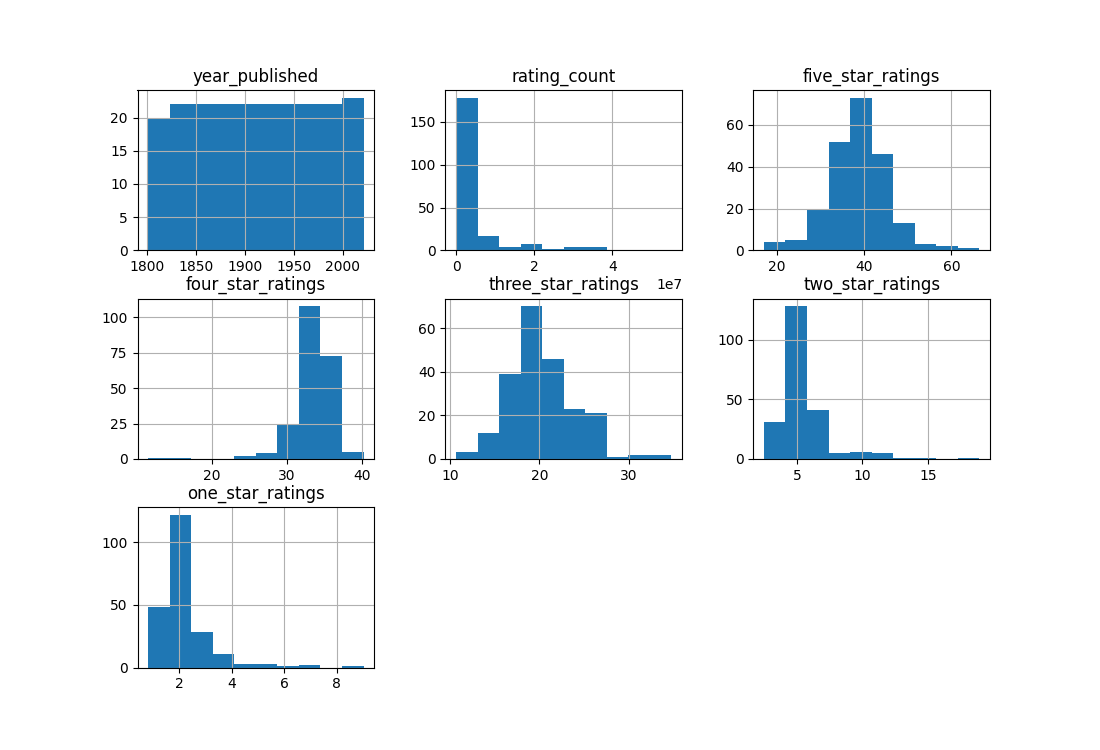

In [52]:
df_ratings.hist(figsize=(11, 7.5));

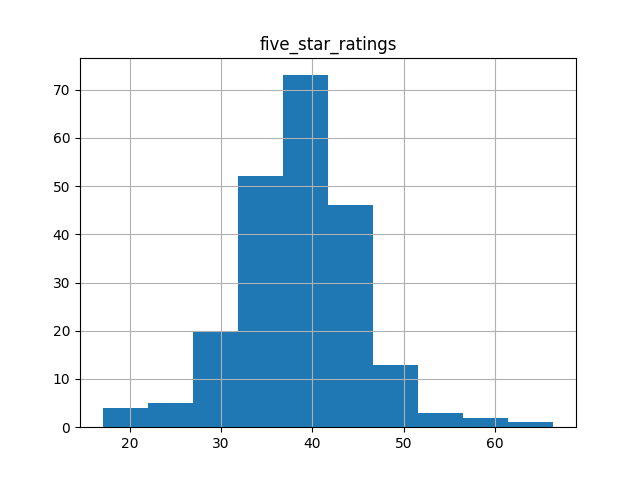

In [53]:
df_ratings.hist(column='five_star_ratings', bins = 10);

### 2.7 Построение графиков в `seaborn`
#### Импорт библиотеки

In [54]:
import seaborn as sns
sns.__version__

'0.13.2'

#### `boxplot`

In [55]:
df_ratings['five_star_ratings']

0      17.021277
1      20.361469
2      42.705279
3      20.191083
4      39.879518
         ...    
214    40.333754
215    41.294209
216    40.775111
217    43.145761
218    66.393443
Name: five_star_ratings, Length: 219, dtype: float64

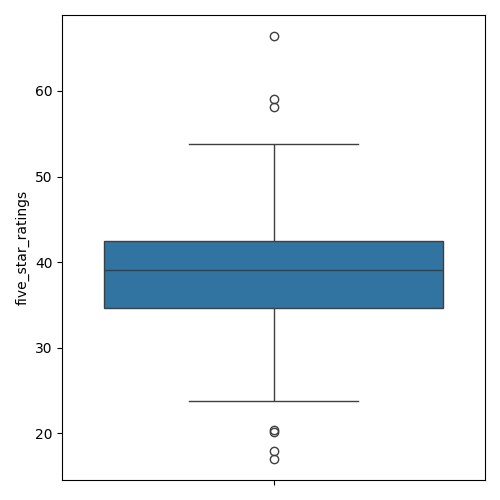

In [56]:
fig_sns, ax_sns = plt.subplots(figsize=(5, 5))
sns.boxplot(ax = ax_sns, data=df_ratings['five_star_ratings']);
fig_sns.tight_layout()

> [Getting Error 0 when plotting boxplot of a filtered dataset](https://stackoverflow.com/a/71423584)

In [ ]:
# import copy
# dff = copy.deepcopy(df_ratings)
# dff = dff.reset_index()
# sns.boxplot(ax = ax_sns, data = dff['five_star_ratings'].values);

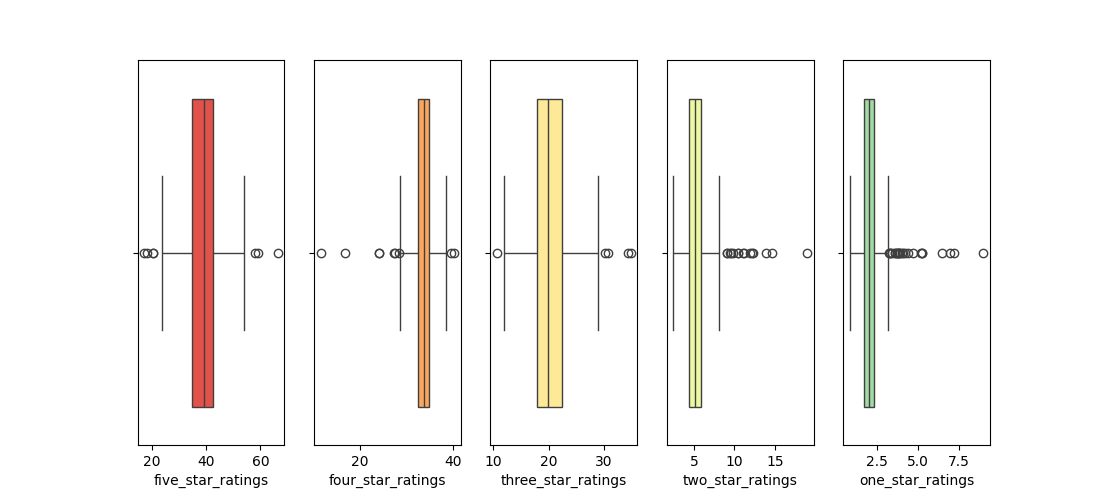

In [58]:
fig_sns, ax_sns = plt.subplots(1, 5, figsize=(11, 5))
sns.boxplot(ax=ax_sns[0], data=df_ratings, x='five_star_ratings');
sns.boxplot(ax=ax_sns[1], data=df_ratings, x='four_star_ratings');
sns.boxplot(ax=ax_sns[2], data=df_ratings, x='three_star_ratings');
sns.boxplot(ax=ax_sns[3], data=df_ratings, x='two_star_ratings');
sns.boxplot(ax=ax_sns[4], data=df_ratings, x='one_star_ratings');
# Пример стайлинга subplot'ов - каждый ящик в свой цвет из палитры
colors = sns.color_palette('Spectral')
cycler = cycle(colors)
for ax in ax_sns:
    for p in ax.patches:
        p.set_facecolor(next(cycler))

#### Ящик с усами
[Wiki](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8)

<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg" width="66%" title="Python logo"/>
</div>

### 2.8 Построение различных графиков

#### Анализ жанров

In [59]:
genres = df['genre'].explode().value_counts().index.tolist()
genres[:10]

['Fiction',
 'Fantasy',
 'Romance',
 'Young Adult',
 'Nonfiction',
 'Historical',
 'Contemporary',
 'Historical Fiction',
 'Mystery',
 'Paranormal']

In [60]:
print(f"Жанров всего: {len(genres)}")

Жанров всего: 1403


Выделим топ-10 жанров и авторов.

In [61]:
auth = df['author'].explode().value_counts().reset_index()
auth = auth[:10]
gen = df['genre'].explode().value_counts().reset_index()
gen = gen[:10]

In [62]:
auth

,author,count
0,Stephen King,94
1,Nora Roberts,94
2,James Patterson,92
3,Agatha Christie,86
4,Erin Hunter,76
5,J.D. Robb,66
6,Terry Pratchett,64
7,Meg Cabot,64
8,Francine Pascal,63
9,Carolyn Keene,59


In [63]:
gen

,genre,count
0,Fiction,24337
1,Fantasy,13058
2,Romance,12397
3,Young Adult,9477
4,Nonfiction,7722
5,Historical,6677
6,Contemporary,6183
7,Historical Fiction,5918
8,Mystery,5830
9,Paranormal,5028


In [65]:
fig_2 = make_subplots(rows=1, cols=2,
                      specs=[[{'type': 'xy'}, {"type": "xy"}]],
                      subplot_titles=("Топ 10 самых популярных жанров",
                                      "Топ 10 самых популярных авторов"))
# Setting Bar parameters
fig_2.add_trace(go.Bar(x=gen.genre,
                       y=gen['count'],
                       name ='Books',
                       marker_color=px.colors.sequential.Plasma),
                       row=1, col=1)
# Setting Bar parameters
fig_2.add_trace(go.Bar(x=auth.author,
                       y=auth['count'],
                       name ='Books',
                       marker_color=px.colors.sequential.Plotly3),
                       row=1, col=2)
# Setting the parameters of the chart when displaying
fig_2.update_traces(marker_line_width=0)

# Setting the parameters of the chart when displaying
fig_2.update_layout(showlegend=False,
                    plot_bgcolor='rgba(0,0,0,0)',
                    font=dict(family='Arial',
                              size=12,
                              color='black'),
                    autosize=False,
                    width=1100,
                    height=800,)

# Displaying the graph
fig_2.show()

#### Введем искусственный признак - тип серии (цикличность)

In [66]:
di = {1: 'Standalone', 2: 'Duology', 3: 'Trilogy'}
df['series_type'] = df['books_in_series_count'].map(di).fillna('Saga')
df['series_type']

0              Saga
1           Duology
2              Saga
3              Saga
4        Standalone
            ...    
52194    Standalone
52195    Standalone
52196    Standalone
52197          Saga
52198    Standalone
Name: series_type, Length: 48562, dtype: object

#### Распределение по типу серии

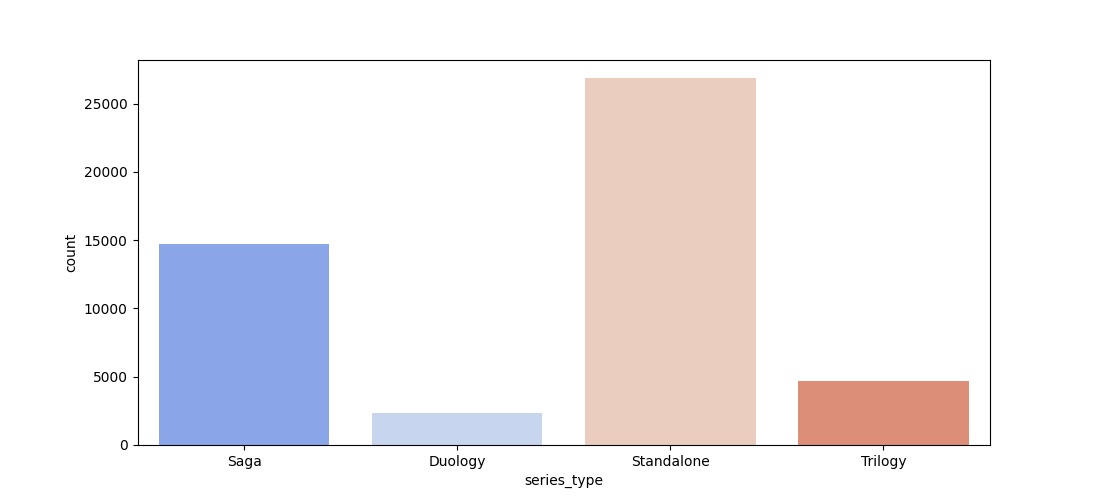

In [67]:
fig_sns, ax_sns = plt.subplots(figsize=(11, 5))
sns.countplot(ax=ax_sns, data=df, x='series_type', hue='series_type', palette='coolwarm');

#### Топ-10 издательств

In [68]:
pubs = df['publisher'].explode().value_counts().index.tolist()
pubs[:10]

['Vintage',
 'HarperCollins',
 'Penguin Books',
 'Ballantine Books',
 'Bantam',
 'Pocket Books',
 'Avon',
 'Del Rey',
 'Berkley',
 'Tor Books']

In [69]:
df['publisher'].value_counts().head(10)

publisher
Vintage             569
HarperCollins       559
Penguin Books       493
Ballantine Books    395
Bantam              373
Pocket Books        318
Avon                307
Del Rey             287
Berkley             287
Tor Books           282
Name: count, dtype: int64

In [70]:
pubs_i = df['publisher'].value_counts().head(10).index
pubs_i

Index(['Vintage', 'HarperCollins', 'Penguin Books', 'Ballantine Books', 'Bantam', 'Pocket Books', 'Avon', 'Del Rey', 'Berkley', 'Tor Books'], dtype='object', name='publisher')

In [71]:
df_pubs = df[df['publisher'].isin(pubs_i)]
df_pubs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3870 entries, 3 to 52183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3870 non-null   int64  
 1   title                  3870 non-null   object 
 2   series                 2104 non-null   object 
 3   author                 3870 non-null   object 
 4   rating_count           3870 non-null   int64  
 5   review_count           3870 non-null   int64  
 6   average_rating         3870 non-null   float64
 7   five_star_ratings      3870 non-null   int64  
 8   four_star_ratings      3870 non-null   int64  
 9   three_star_ratings     3870 non-null   int64  
 10  two_star_ratings       3870 non-null   int64  
 11  one_star_ratings       3870 non-null   int64  
 12  number_of_pages        3844 non-null   float64
 13  publisher              3870 non-null   object 
 14  genre                  3870 non-null   object 
 15  settings

#### Количество книг в топ-10 издательств

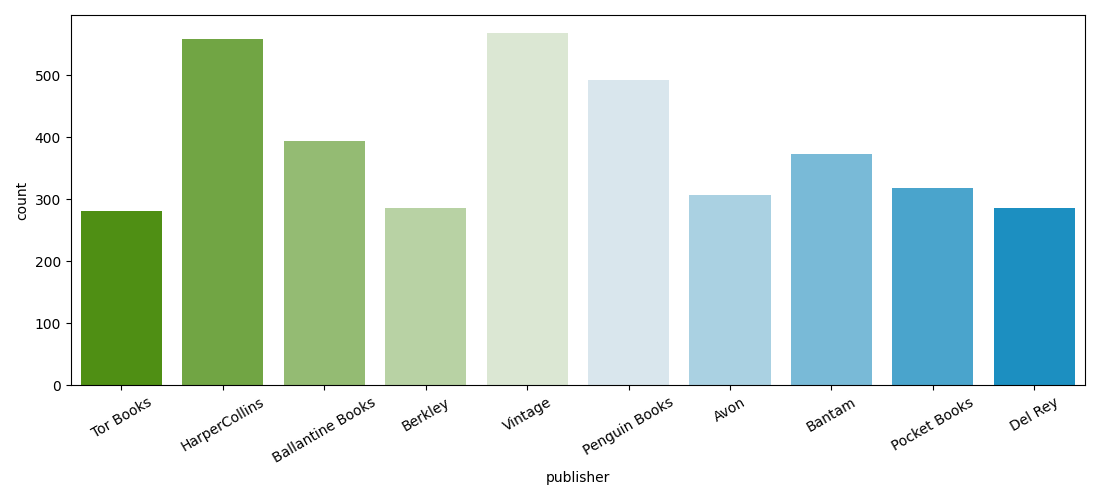

In [72]:
fig_sns, ax_sns = plt.subplots(figsize=(11, 5))
pal = sns.diverging_palette(120, 240, s=100, l=60, center='light', n=df_pubs['publisher'].value_counts().shape[0])
sns.countplot(ax=ax_sns, data=df_pubs, x='publisher', hue='publisher', palette=pal);
ax_sns.tick_params(axis='x', rotation=30)
fig_sns.tight_layout()

#### Количество книг в топ-10 издательств по типу серии

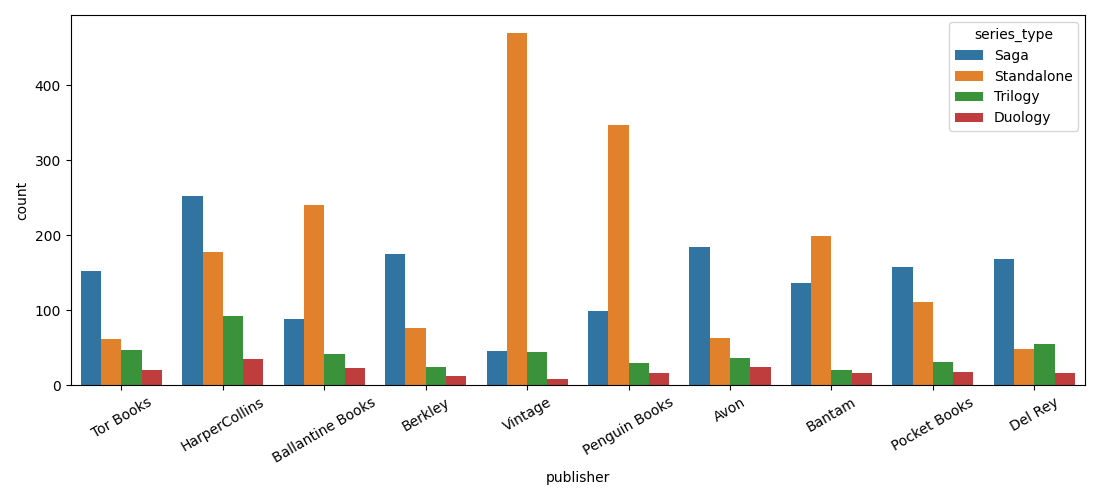

In [74]:
fig_sns, ax_sns = plt.subplots(figsize=(11, 5))
sns.countplot(ax=ax_sns, data=df_pubs, x='publisher', hue='series_type');
ax_sns.tick_params(axis='x', rotation=30)
fig_sns.tight_layout()

#### Топ-10 издательств по количеству оценок в определенном жанре

In [75]:
df_grouped_by_pub = df.groupby('publisher') \
    .agg({'title':'count',
          'average_rating':'mean',
          'rating_count': 'sum'}) \
    .reset_index()

In [76]:
df_pub_popular = df_grouped_by_pub.sort_values(by=['rating_count'], ascending=False)[:10]
df_pub_popular

,publisher,title,average_rating,rating_count
6335,Penguin Books,493,3.955436,25439700
5004,"Little, Brown and Company",177,3.880169,21155025
8740,Vintage,569,3.939789,14314933
7402,Scholastic Press,162,4.085679,14186630
7427,Scribner,165,3.913030,13617858
6357,Penguin Classics,263,3.937452,13457344
846,Bantam,373,3.974129,13307327
824,Ballantine Books,395,3.959747,12543216
3754,HarperCollins,559,4.065081,11690798
3407,Grand Central Publishing,261,3.953946,11158290


In [77]:
def barplot_by_genre(genre):
    mask = [genre in x for x in df['genre']]
    newframe = df[mask]
    df_grouped_by_pub = newframe.groupby('publisher') \
       .agg({'title':'count', 'average_rating':'mean', 'rating_count': 'sum'}) \
       .reset_index()
    df_popular = df_grouped_by_pub.sort_values(by=['rating_count'], ascending=False)[:10]
    barplot = px.bar(data_frame = df_popular,
                     x = 'publisher',
                     y = 'rating_count',
                     labels = {'publisher': 'Издательство', 'rating_count': 'Количество оценок', 'average_rating': 'Рейтинг'},
                     color = 'average_rating',
                     opacity = 0.9,
                     orientation = 'v',
                     barmode = 'relative',
                     title = f"Топ 10 издательств по количеству оценок в жанре \"{genre}\"",
                    )
    barplot.layout.update(autosize=False,
                          width=1100,
                          height=800,
                          title_x = 0.5)
    barplot
    barplot.show()

In [78]:
interact(barplot_by_genre, genre=genres, df = fixed(df));

interactive(children=(Dropdown(description='genre', options=('Fiction', 'Fantasy', 'Romance', 'Young Adult', '…

[[0.73647059 0.08       0.10117647 1.        ]
 [0.88133795 0.17700884 0.14925029 1.        ]
 [0.96585928 0.34340638 0.24405998 1.        ]
 [0.9867128  0.51164937 0.38615917 1.        ]
 [0.98823529 0.67154171 0.56053825 1.        ]]


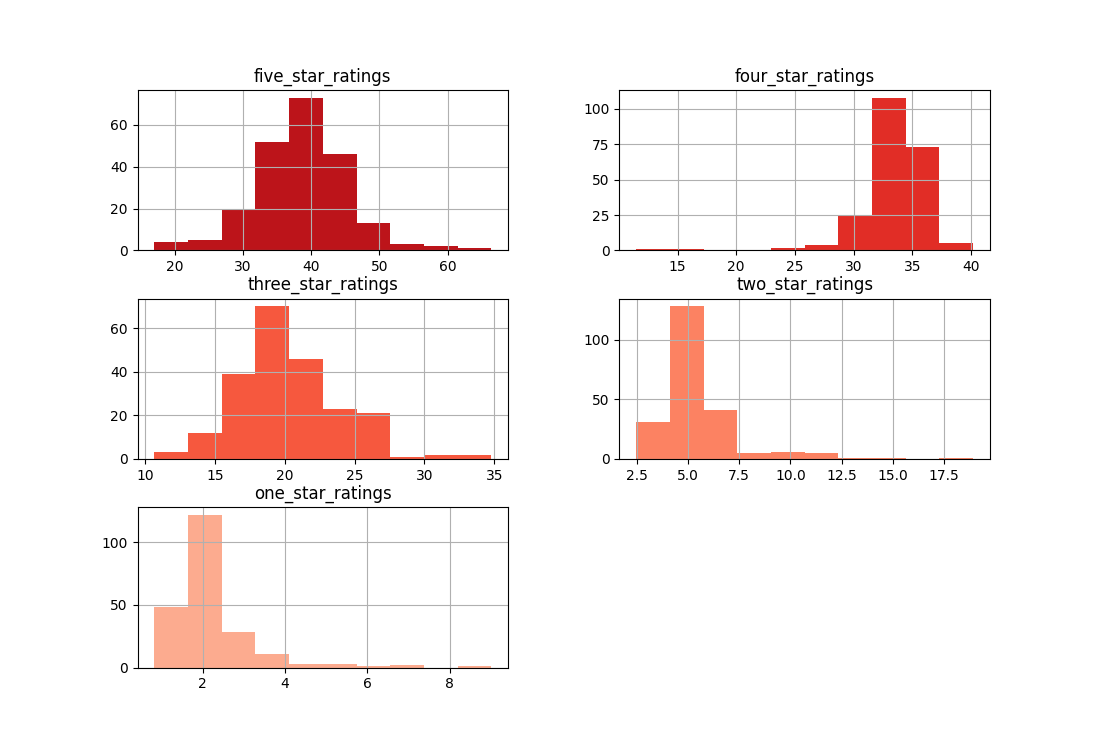

In [80]:
# гистограммы с цикличной сменой цвета
feat = [f for f in df.columns if 'star' in f]
colors = cm.Reds(np.linspace(0.8, 0.3, len(feat)))
print(colors)
cycler = cycle(colors)

axes = df_ratings[feat].hist(figsize=(11, 7.5));
for ax in axes.flatten().tolist():
    c = next(cycler)
    for p in ax.patches:
        p.set_facecolor(c)

#### `pairplot`

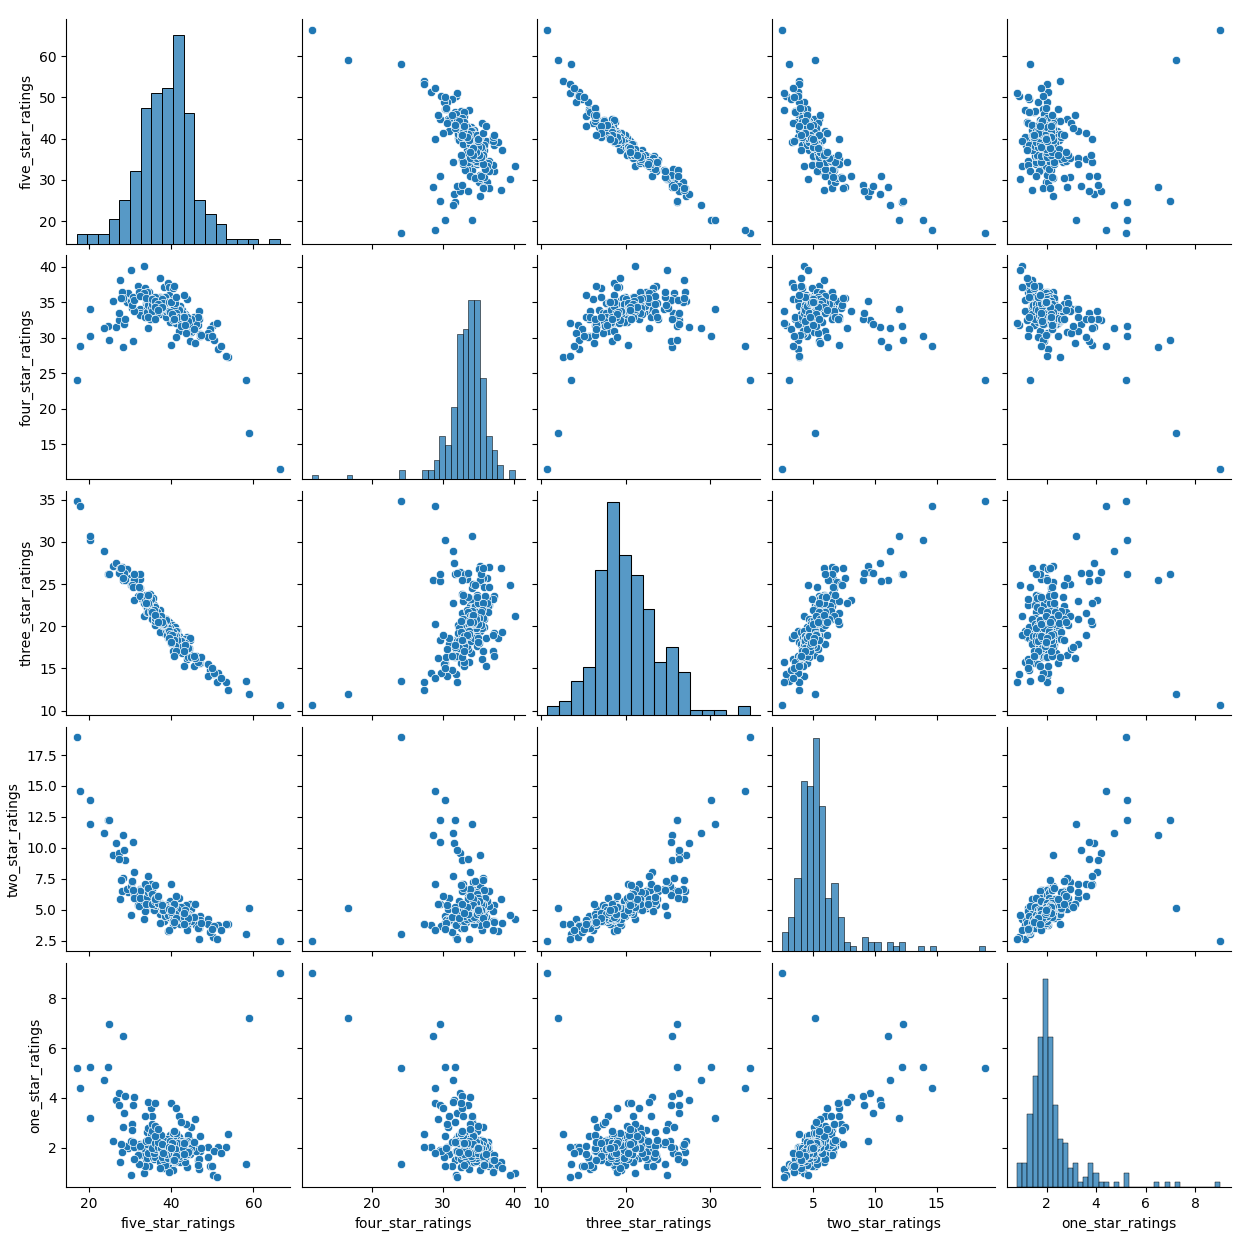

In [81]:
sns.pairplot(height=2.5, data=df_ratings[feat]);

#### Связь рейтинга книги с количеством страниц и количеством сиквелов

In [88]:
series_type_anno = [('Любая', 'All'), ('Отдельная', 'Standalone'),
                    ('Дилогия', 'Duology'), ('Трилогия', 'Trilogy'),
                    ('Цикл', 'Saga')]
series_type_dict = dict()
for t in series_type_anno:
    series_type_dict[t[1]] = t[0]

toggle = widgets.ToggleButtons(options=series_type_anno,
                               description='Цикличность:',
                               disabled=False,
                               button_style='',
                               tooltips=['Любое количество книг',
                                        'Отдельная книга',
                                        'Две книги в цикле',
                                        'Три книги в цикле',
                                        'Больше книг богу книг']
                                )
def making_pages(df, toggle, label):
    df_pages = df[df['number_of_pages'] <= 1500].copy()
    if not toggle == 'All':
        mask = [toggle in x for x in df_pages['series_type']]
        colour = 'rating_count'
    else:
        mask = [True for x in df_pages['series_type']]
        colour = 'series_type'
    title = f"Зависимость рейтинга от количества страниц для цикличности \"{label}\""
    fig = px.scatter(df_pages[mask],
                     x="number_of_pages",
                     y="rating_count",
                     labels = {"number_of_pages": 'Количество страниц', "rating_count": 'Количество оценок',
                               "review_count": 'Количество рецензий', "series_type": 'Цикличность'},
                     size='review_count',
                     color="review_count",
                     hover_data=['title', 'author'],
                     facet_col="series_type",
                     title = title
                    )
    # Меняем названия subplot'ов
    fig.for_each_annotation(lambda a: a.update(text = series_type_dict[a.text.split('=')[1]]))
    # Меняем названия рядов в легенде
    # fig.for_each_trace(lambda t: t.update(name = series_type_dict[t.name],
    #                                       legendgroup = series_type_dict[t.name],
    #                                       hovertemplate = t.hovertemplate.replace(t.name, series_type_dict[t.name.split('=')[1]])
    #                                      ) if t.name != '' else '')

    fig.layout.update(autosize=False,
                      width=1300,
                      height=400,
                      title_x = 0.5)
    fig.show()

    df_scat = df_pages[mask].groupby(['year_published', 'series_type']) \
        .agg({'average_rating' : 'mean',
              'rating_count' : 'sum',
              'review_count' : 'sum'}) \
        .reset_index()
    df_scat = df_scat[df_scat.year_published > 1950]
    title = f"Средняя оценка для цикличности \"{label}\" c 1950 по 2021 гг."
    fig = px.scatter(df_scat,
                     y="average_rating",
                     x="year_published",
                     labels = {"average_rating": 'Средняя оценка', "year_published": 'Год выхода', "series_type": 'Цикличность', "rating_count": 'Количество оценок'},
                     log_x=True,
                     log_y=True,
                     color=colour,
                     size="rating_count",
                     title = title)
    fig.layout.update(autosize=False,
                      width=1100,
                      height=400,
                      title_x = 0.5)
    fig.show()

In [89]:
interact(making_pages, toggle = toggle, label = toggle.label, df=fixed(df));

interactive(children=(ToggleButtons(description='Цикличность:', options=(('Любая', 'All'), ('Отдельная', 'Stan…

#### `heatmap`

In [90]:
df.corr()

ValueError: could not convert string to float: 'Inner Circle'

In [91]:
# фикс
# since pandas version 2.0.0 now you need to add numeric_only=True param to avoid the issue
# https://stackoverflow.com/a/76717659
df.corr(numeric_only=True)

,id,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,year_published,books_in_series_count,awards_count
id,1.000000,-0.018870,0.055714,0.140992,-0.013166,-0.018841,-0.030453,-0.025056,-0.017077,-0.023812,0.250141,-0.051632,-0.010081
rating_count,-0.018870,1.000000,0.831896,0.033575,0.970995,0.986749,0.937906,0.854123,0.758821,0.031390,-0.040727,0.010896,0.362991
review_count,0.055714,0.831896,1.000000,0.024583,0.778147,0.853200,0.808335,0.737092,0.618566,0.041081,0.008871,-0.016929,0.478139
average_rating,0.140992,0.033575,0.024583,1.000000,0.056972,0.029730,-0.010951,-0.033353,-0.020523,0.146987,0.024327,0.165207,-0.008471
five_star_ratings,-0.013166,0.970995,0.778147,0.056972,1.000000,0.931121,0.829844,0.723096,0.652092,0.033541,-0.031668,0.017074,0.348821
four_star_ratings,-0.018841,0.986749,0.853200,0.029730,0.931121,1.000000,0.959334,0.862487,0.733489,0.031012,-0.042099,0.008962,0.368648
three_star_ratings,-0.030453,0.937906,0.808335,-0.010951,0.829844,0.959334,1.000000,0.958384,0.831717,0.022540,-0.054645,0.002224,0.339277
two_star_ratings,-0.025056,0.854123,0.737092,-0.033353,0.723096,0.862487,0.958384,1.000000,0.936248,0.020109,-0.049732,-0.009856,0.300122
one_star_ratings,-0.017077,0.758821,0.618566,-0.020523,0.652092,0.733489,0.831717,0.936248,1.000000,0.019594,-0.033319,-0.007701,0.257341
number_of_pages,-0.023812,0.031390,0.041081,0.146987,0.033541,0.031012,0.022540,0.020109,0.019594,1.000000,-0.025069,0.035776,0.034995


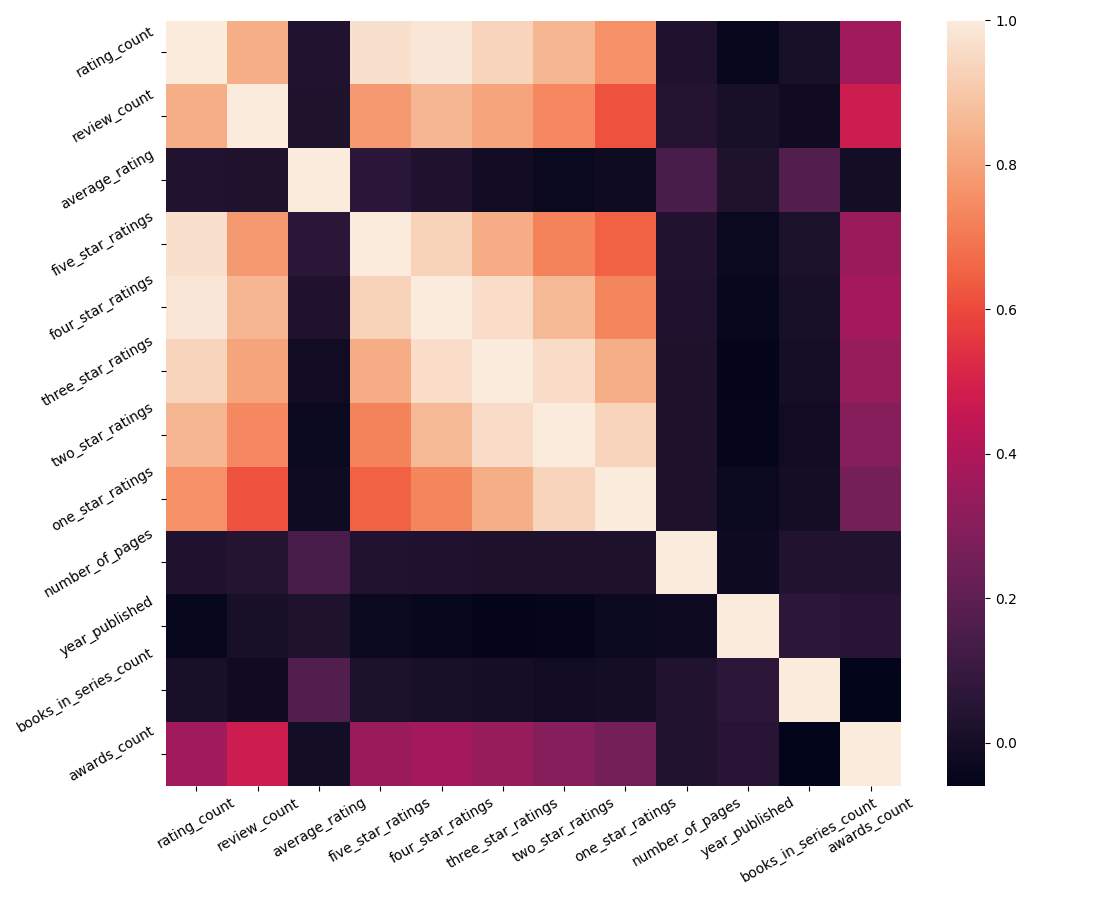

In [92]:
fig_sns, ax_sns = plt.subplots(figsize=(11, 9))
sns.heatmap(ax = ax_sns, data = df[df.columns[~df.columns.isin(['id'])]].corr(numeric_only=True));
for item in ax_sns.get_xticklabels():
    item.set_rotation(30)
for item in ax_sns.get_yticklabels():
    item.set_rotation(30)
fig_sns.tight_layout()

#### violinplot

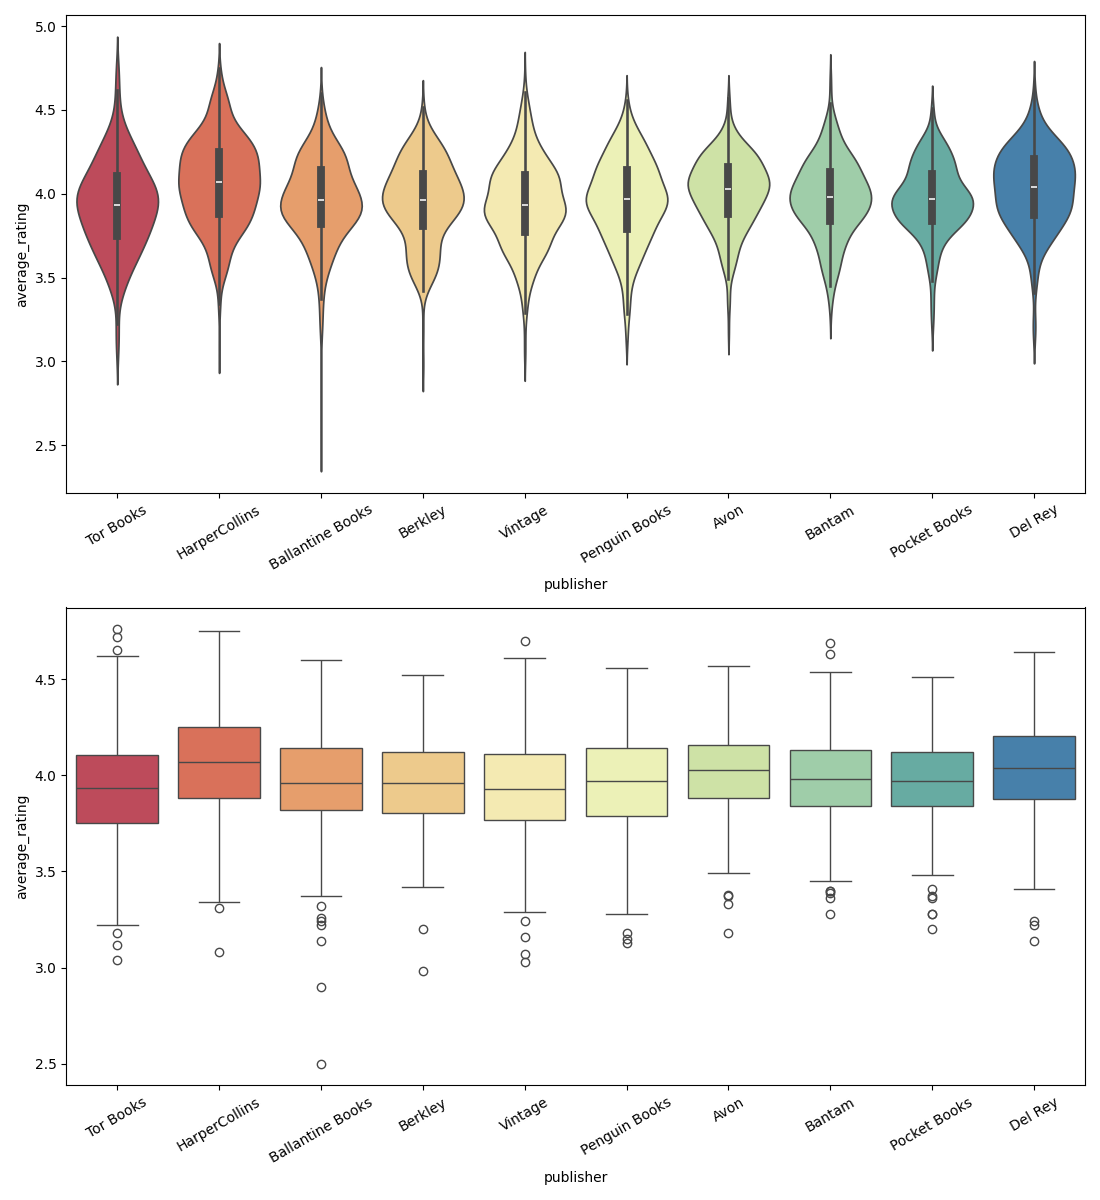

In [94]:
fig_sns, ax_sns = plt.subplots(2, 1, figsize=(11, 12))
sns.violinplot(ax = ax_sns[0], data = df_pubs, x = 'publisher', y = 'average_rating', hue = 'publisher', palette = 'Spectral');
sns.boxplot(ax = ax_sns[1], data = df_pubs, x = 'publisher', y = 'average_rating', hue = 'publisher', palette = 'Spectral');
for ax in ax_sns:
    ax.tick_params(axis='x', rotation=30)
fig_sns.tight_layout()

#### QQ-график
Графики Q-Q (квантиль-квантиль) сравнивают два распределения вероятностей путем построения совместных квантилей. График Q-Q используется для сравнения форм распределений, обеспечивая графическое представление того, насколько подобны или различны положение, масштаб и асимметрия двух распределений.

С помощью него определяем насколько числовой признак похож на нормальное распределение. Поскольку целый ряд методов статистики предполагают, что распределение признака нормальное. QQ-график — один из способов проверить нормальность распределения.

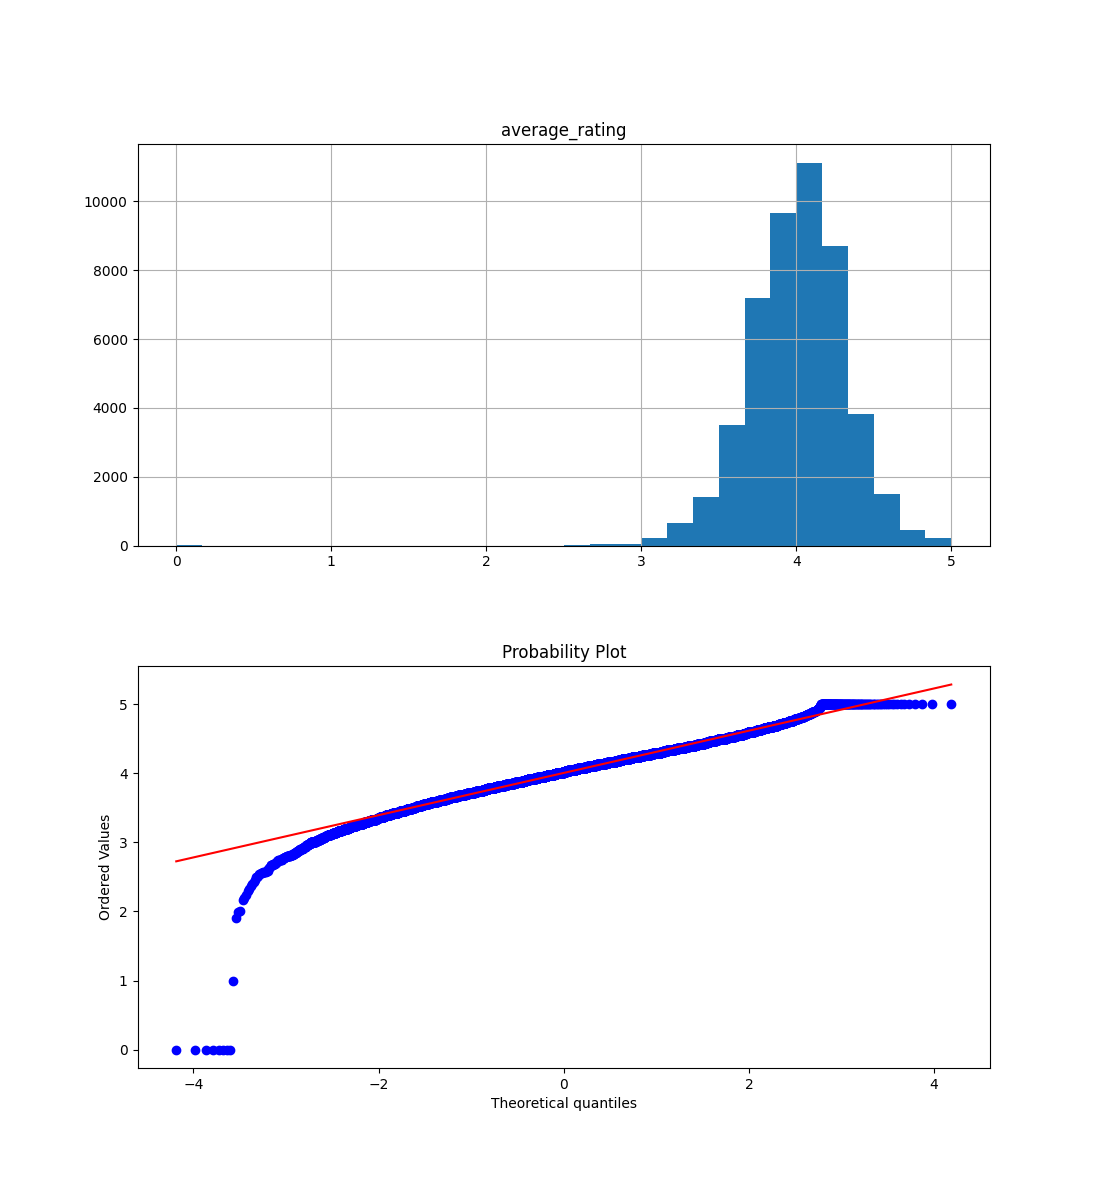

In [96]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(11, 12))
stats.probplot( df['average_rating'], dist="norm", plot=plt)
plt.subplot(2,1,2)
df.hist(ax = ax_p[0], column = 'average_rating', bins = 30 )
plt.show()

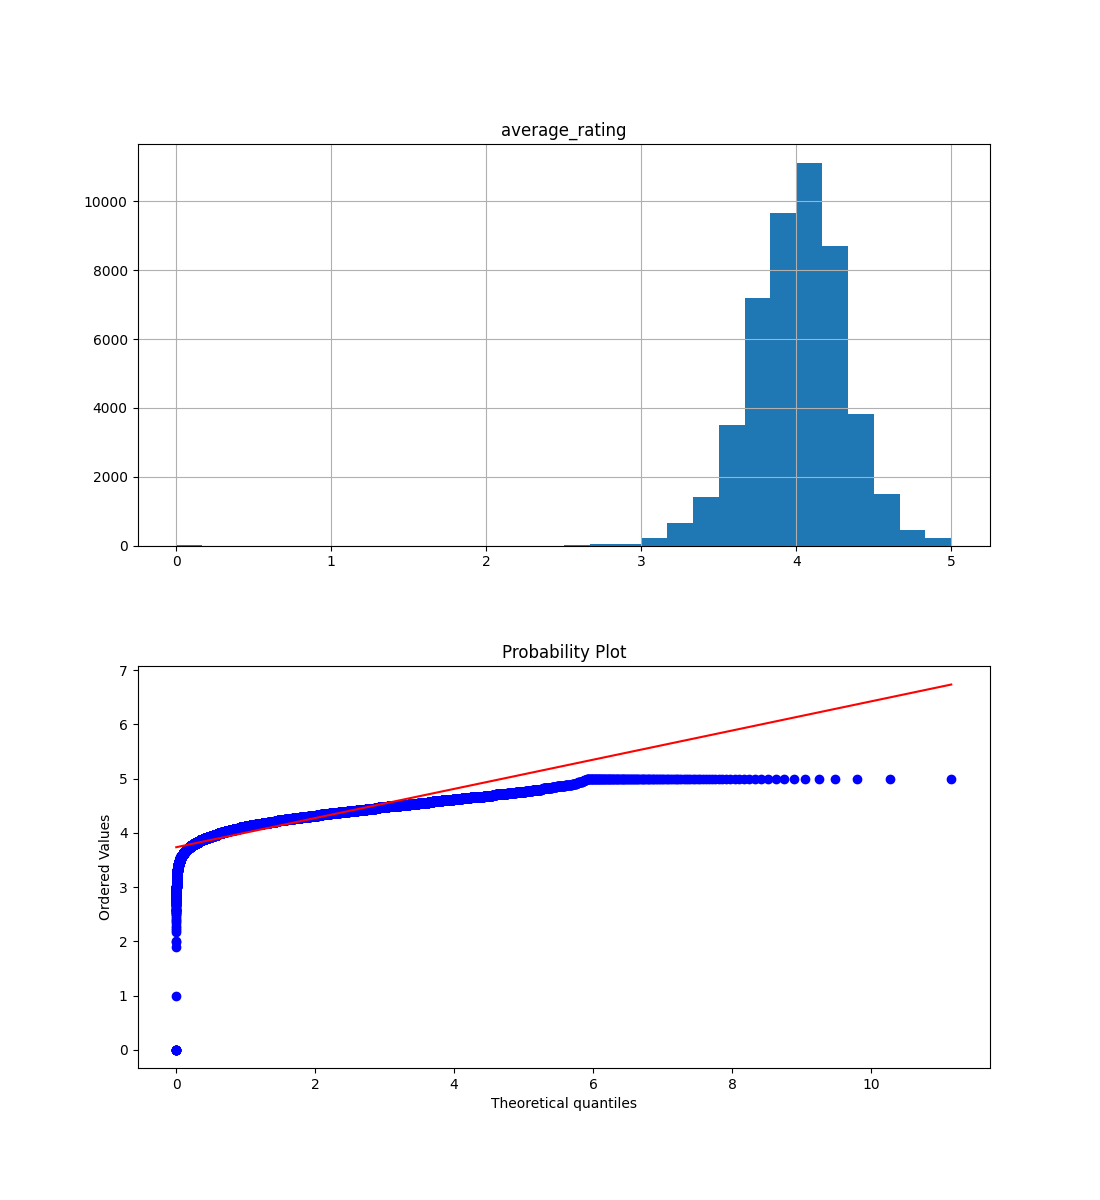

In [97]:
from scipy import stats

fig_p, ax_p = plt.subplots(2, 1, figsize=(11, 12))
stats.probplot( df['average_rating'], dist=stats.expon, plot=plt)
plt.subplot(2,1,2)
df.hist(ax = ax_p[0], column = 'average_rating', bins = 30 )
plt.show()

### 2.9 Экспорт в растровый и векторный форматы
DPI - dots per inch - разрешение нашего рисунка, количество точек на дюйм. Пришло из полиграфии. "Физический" размер рисунка может оставаться таким же, а изменение `dpi` приведет к изменению размера рисунка на бумаге или в документе. 300 dpi достаточно для печати. Соответственно, комбинация `figsize=(w, h)` и `dpi=n` задает искомый размер (в документе размер рисунка можно поправить, и визуально качество не ухудшится, а вот на печати это скажется при апскейле) и разрешение (для печати и отображения).
Рисунки, содержащие графики, желательно экспортировать в векторный формат, чтобы не страдало качество печати.

#### matplotlib

In [98]:
# Сохранение в растровый формат, matplotlib
ipl.savefig(Path(data_path, 'ratings_by_year_300.png'), dpi=300)
ipl.savefig(Path(data_path, 'ratings_by_year_600.png'), dpi=600)

In [99]:
# Сохранение в векторный формат, matplotlib
ipl.savefig(Path(data_path, 'ratings_by_year.svg'), dpi=300)

#### plotly
В `plotly` нет явного параметра `dpi`, есть только размер в пикселах и параметр `scale`.
Необходимо установить `kaleido`. Однако, последняя версия не работает, см. [Not able to save plotly plots using to_image or write_image](https://stackoverflow.com/questions/70997997/not-able-to-save-plotly-plots-using-to-image-or-write-image).
```bash
pip install kaleido==0.1.0post1
```

In [100]:
# Сохранение в растровый формат, plotly
import plotly
plotly.io.kaleido.scope.mathjax=None
fig_2.write_image(Path(data_path, 'top10_authors_and_genres.png'), format='png', engine='kaleido')

In [101]:
# Сохранение в векторный формат, plotly
fig_2.write_image(Path(data_path, 'top10_authors_and_genres.svg'))

### 2.10 `plotly` `Dash`

- [A Minimal Dash App](https://dash.plotly.com/minimal-app)
- [Dash in Jupyter Environments](https://dash.plotly.com/dash-in-jupyter)
- [Dash Example Index]()

#### Интерактивный график 2.5 с использованием `Dash`

In [103]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd

app = Dash(__name__)

app.layout = html.Div(
    [
        html.H2(
            "Средний пользовательский рейтинг",
            style={
                'text-align': 'center',
                'font-family': 'Ink Free'
            }
        ),
        
        html.Div(
            [
                html.Br(),
                dcc.Checklist(
                    id="toggle-rangeslider",
                    options=[{"label": " Слайдер «Год выхода»", "value": "slider"}],
                    value=["slider"],
                    style={
                        'font-family': 'Tiger Expert',
                        'font-weight': 'bold',
                        'text-align': 'left'
                    }
                ),
                html.Br(),
                dcc.Graph(
                    id="graph",
                    style={
                        'font-weight': 'bold',
                        'font-size': '24'
                    }
                )
            ],
            style={
                "display": "flex", 
                'align-items': 'left',
                'flex-direction': 'column'
            }
        ),
    ], style={
        'background-color': 'rgba(180, 180, 180, 0.5)',
        'display': 'flex',
        'align-items': 'center',
        'flex-direction': 'column'
    }
)


@app.callback(
    Output("graph", "figure"),
    Input("toggle-rangeslider", "value"),
)
def display_scatter(value):
    fig_1 = go.Figure()

    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.five_star_ratings), name = '★★★★★'))
    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.four_star_ratings), name = '★★★★'))
    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.three_star_ratings), name = '★★★'))
    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.two_star_ratings),name = '★★'))
    fig_1.add_trace(
        go.Scatter(x=list(df_ratings.year_published),
                   y=list(df_ratings.one_star_ratings), name = '★'))

    # Set title
    fig_1.update_layout(
        # title_text="Средний пользовательский рейтинг",
        title_x=0.5,
        legend_title="Рейтинг",
        legend = dict(orientation = "v", y = .5, x = 1.025),
        font_family = 'Ink Free'
    )

    # Add range slider
    fig_1.update_layout(
        xaxis = dict(
            rangeselector = dict(
                buttons = list([
                    dict(count = 21,
                         label = "21y",
                         step = "year",
                         stepmode = "backward"),
                    dict(count = 100,
                         label = "100y",
                         step = "year",
                         stepmode = "backward"),
                    dict(step = "all")
                ])
            ),
            rangeslider = dict(
                visible = "slider" in value
            ),
            type = "date"
        ),
        autosize=False,
        width=1100,
        height=800,
    )

    return  fig_1


if __name__ == "__main__":
    app.run_server(debug=True, mode='jupyterlab')